# CS422 Project  - Depression Integrative Analysis and Prediction for Students

## Problem Definition

Depression among university students is a growing public health concern, with significant impacts on academic performance and physical and mental health.Early detection will be crucial for effective intervention and can help schools find and support students who may need help.This project utilizes several predictive models using supervised to achieve depression prediction and provide actionable recommendations to detect and intervent depression among university students.

## Data Overview

This dataset compiles a wide range of information aimed at understanding, analyzing, and predicting depression levels among students. It is designed for research in psychology, data science, and education, providing insights into factors that contribute to student mental health challenges.This dataset collects a large amount of data from currently highly concerned populations with depression tendencies.A total of 27901 rows of data, each representing a student, bear information for 18 columns.The specific meanings of each column are as follows.
### Feature:
**ID**: Unique identifier for each student  
**Age**: Age of the student  
**Gender**: Gender (e.g., Male, Female)    
**City**: Geographic region  
**CGPA**: Grade Point Average or other academic scores    
**Sleep Duration**: Average daily sleep duration  
**Profession**: Almost "Student" (redundant, can be dropped)    
**Work Pressure**:The level of work pressure (scale 1–5 , 0 if not applicable)  
**Academic Pressure**:Level of academic pressure (scale 1–5)  
**Study Satisfaction**:Satisfaction with studies (scale 1–5)  
**Job Satisfaction**:Satisfaction with current job (if any)   
**Dietary Habits**:The quality of diet (e.g.,Healthy)  
**Degree**:Types of academic program (e.g.,BSc,MCA)  
**Have you ever had suicidal thoughts ?**:Binary(Yes/No response about suicidal ideation)  
**Work/Study Hours**:Number of daily hours spent studying or working  
**Financial Stress**: Financial burden level (scale 1–5)  
**Family History of Mental Illness**:Binary(Yes/No indicating family history)  
### Target Variable:  
**Depression**: Binary (1:Yes,0:No)- Class label  

Then load the dataset used for analysis into Python using Pandas data frames and check the data.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_orig = pd.read_csv('Student Depression Dataset.csv')

In [3]:
data_orig

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [4]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## Data Processing

**Data Processing includes the following steps:Comprehensive Data Cleaning, Created Data visulizations,Data Transformation and Feature Engineering.Data Processing bridges the gap between "raw data" and "actionable insights," enabling the following model algorithms to uncover meaningful patterns, trends, and relationships effectively.**

### Comprehensive Data Cleaning

The most important steps of Data cleaning include removing noise, inconsistencies, duplicates, and missing values.Data cleaning outlines the data cleaning steps performed to ensure the dataset is suitable for modeling. 

**Handle the Missing Values**

In [5]:
data_orig.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
# Drop rows with any missing values
data =data_orig.dropna()

In [7]:
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
data.duplicated().sum()

0

The number of the duplicate rows in all records is 0.

In [9]:
# Rename long column names to be simple 
data = data.rename(columns={'Have you ever had suicidal thoughts ?': 'SuicidalThoughts'})
data = data.rename(columns={'Work/Study Hours': 'WSHours'})
data = data.rename(columns={'Family History of Mental Illness': 'FamilyHistory'})

In [10]:
data.nunique()

id                    27898
Gender                    2
Age                      34
City                     52
Profession               14
Academic Pressure         6
Work Pressure             3
CGPA                    332
Study Satisfaction        6
Job Satisfaction          5
Sleep Duration            5
Dietary Habits            4
Degree                   28
SuicidalThoughts          2
WSHours                  13
Financial Stress          5
FamilyHistory             2
Depression                2
dtype: int64

**Drop irrelevant columns**

The id is obviously irrelevant feature.

In [11]:
# Drop irrelevant columns
data.drop(columns=['id'], inplace=True)

In [12]:
# Import Libraries create the boxplots
import matplotlib.pyplot as plt
import seaborn as sns

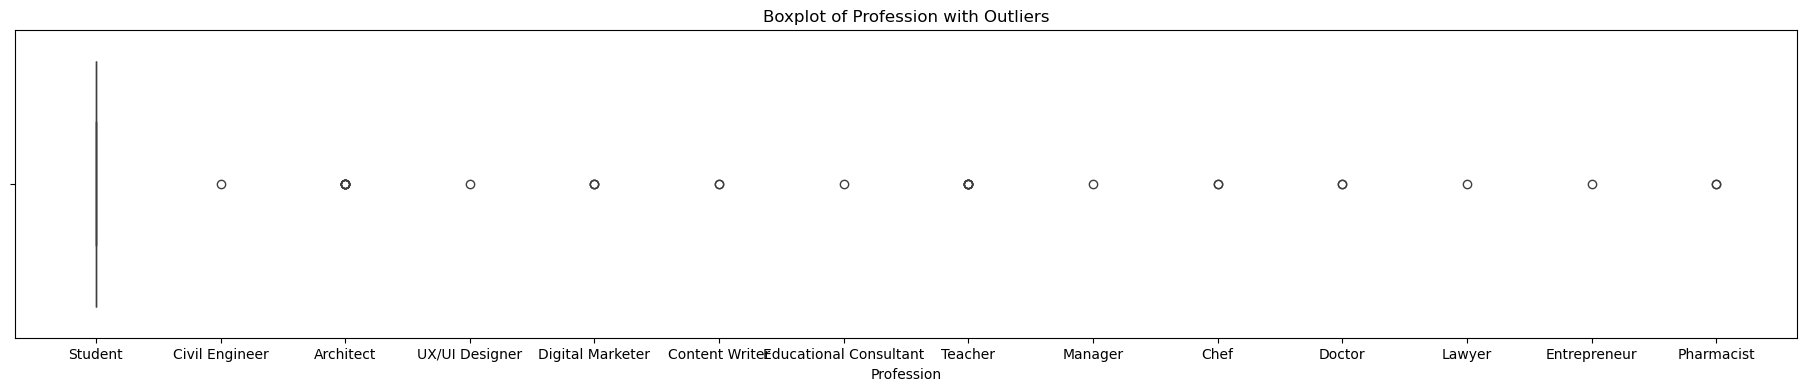

In [13]:
plt.figure(figsize=(23, 4))
sns.boxplot(x=data['Profession'])
plt.title(f'Boxplot of Profession with Outliers')
plt.show()

We can see the feature of 'Profession' is almost just 1 unique value "Student",so it's redundant which can be dropped.

In [14]:
data.drop(columns=['Profession'], inplace=True)

Observing the data set, we can find that the City feature only contains certain cities in India, and we do not care about the impact of localized areas on student depression, which is of no benefit to the analysis of the issues we care about,so it's also redundant which can be dropped.

In [15]:
data.drop(columns=['City'], inplace=True)

**Process outlier removal**

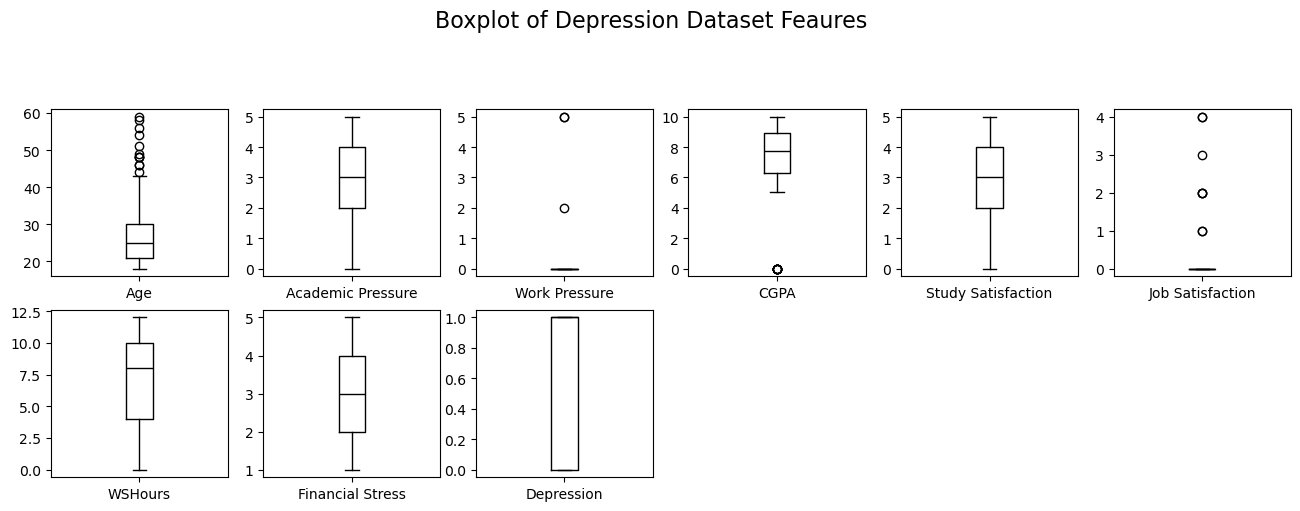

In [16]:
# See outliers in the numeric columns
data.plot(kind='box',subplots=True,layout=(4,6),figsize=(16,10),color='black')
plt.suptitle('Boxplot of Depression Dataset Feaures',fontsize=16)
plt.show()

We can see the feature of "Work Pressure" and "Job Satisfaction" are almost just 1 unique value ,so they're redundant which can be dropped.

In [17]:
data.drop(columns=['Job Satisfaction','Work Pressure'], inplace=True)

In [18]:
cat_cols = ['Gender', 'Dietary Habits', 'Degree', 'SuicidalThoughts',
                        'FamilyHistory', 'Grade level' , 'Sleep Duration']
num_cols = ['Age', 'Academic Pressure', 'CGPA' , 'Study Satisfaction', 'Financial Stress', 'WSHours']

Using Local Outlier Factor processes outlier removal. 

In [19]:
#Import necessary libraries to process outlier removal.
from sklearn.neighbors import LocalOutlierFactor

In [20]:
# Step 1: Fit the Local Outlier Factor model
model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Applying LOF to the original data
data['outlier'] = model.fit_predict(data[num_cols])

df_no_outliers = data[data['outlier'] == 1]
# Remove outliers from original data
data = df_no_outliers.drop(columns=['outlier'])
data.shape

(27619, 13)

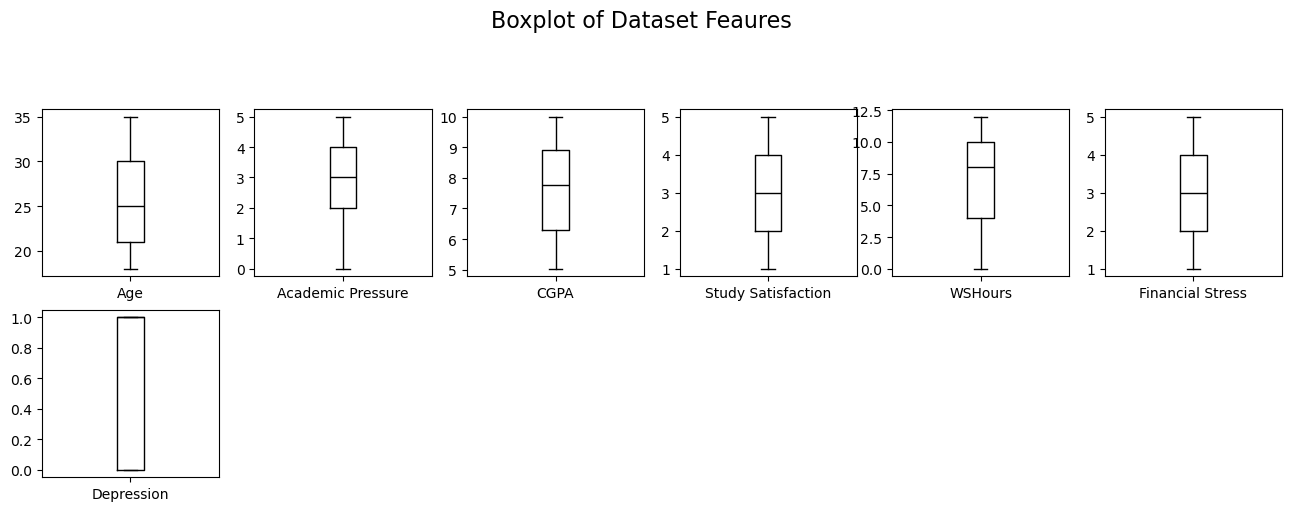

In [21]:
# Plot again to confirm removal
data.plot(kind='box',subplots=True,layout=(4,6),figsize=(16,10),color='black')
plt.suptitle('Boxplot of Dataset Feaures',fontsize=16)
plt.show()

After applying LocalOutlierFactor model, outliers were extracted, leaving a cleaned dataset of 26,503 rows and 18 columns.Using Local Outlier Factor to filter outliers and drop the outlier column, so it's an efficient data cleaning!

### Data visulizations

*The overall distribution of the depression target variable.*

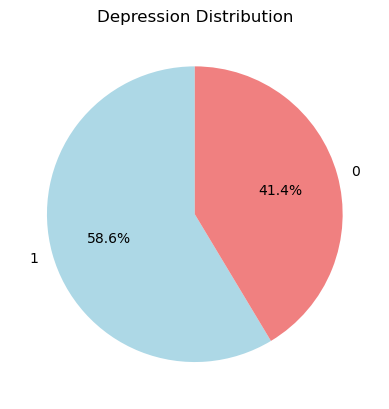

In [22]:
import plotly.express as px
import plotly.io as pio
from math import pi
import math
data['Depression'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Depression Distribution')
plt.ylabel('')
plt.show()

It can be seen that the proportion of depression among students is higher than that of normal.The data visulization suggests a concerning prevalence of depressive symptoms in the studied population. 

*See the depression distribution across genders.*

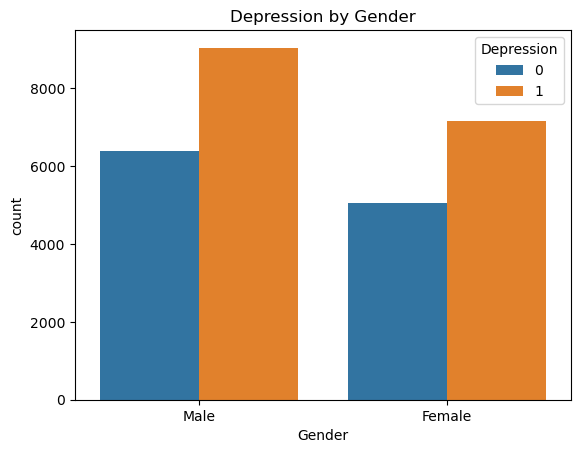

In [23]:
sns.countplot(x='Gender', hue='Depression', data=data)
plt.title('Depression by Gender')
plt.show()

We can see the higher counts for having depression in both genders,and their category gaps are similar.

*See the depression distribution across sleep duration.*

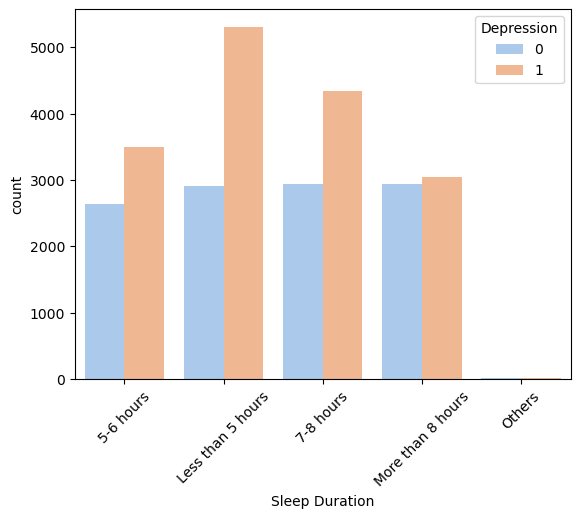

In [24]:
#For sleep duration
sns.countplot(data=data, x='Sleep Duration', hue='Depression', palette='pastel')
plt.xticks(rotation=45)
plt.show()

*See the depression distribution across degree.*

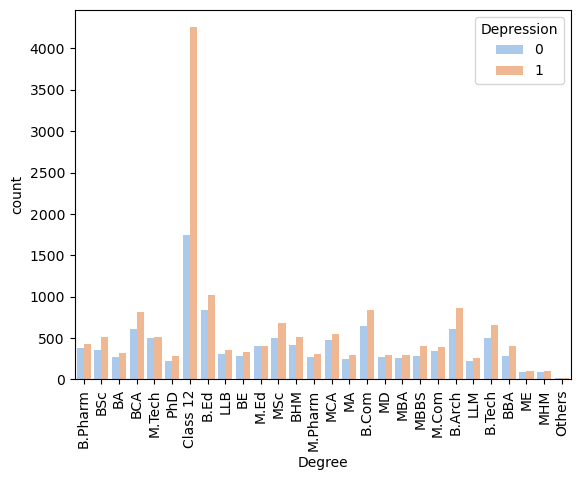

In [25]:
#For degree
sns.countplot(data=data, x='Degree', hue='Depression', palette='pastel')
plt.xticks(rotation=90)
plt.show()

*See the depression distribution across Family History of mental illness.*

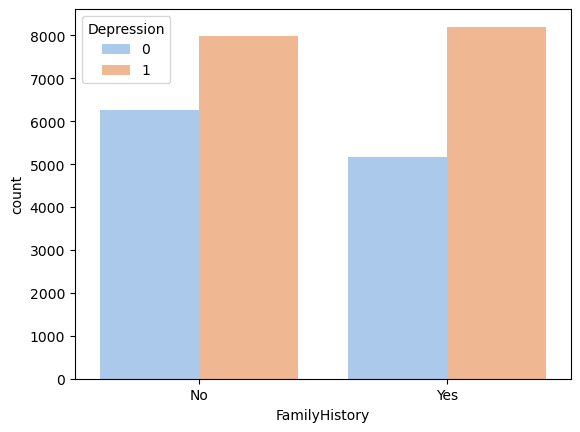

In [26]:
#For Family History of mental illness
sns.countplot(data=data, x='FamilyHistory', hue='Depression', palette='pastel')
plt.show()

With a family history of mental illness, 5,000 have no depression but 8,000 have it—stronger depression link with family history.Its category gap is greater than the case of no family history,so we can know there is stronger depression link with family history.

*See the distributions of Numeric Features.*

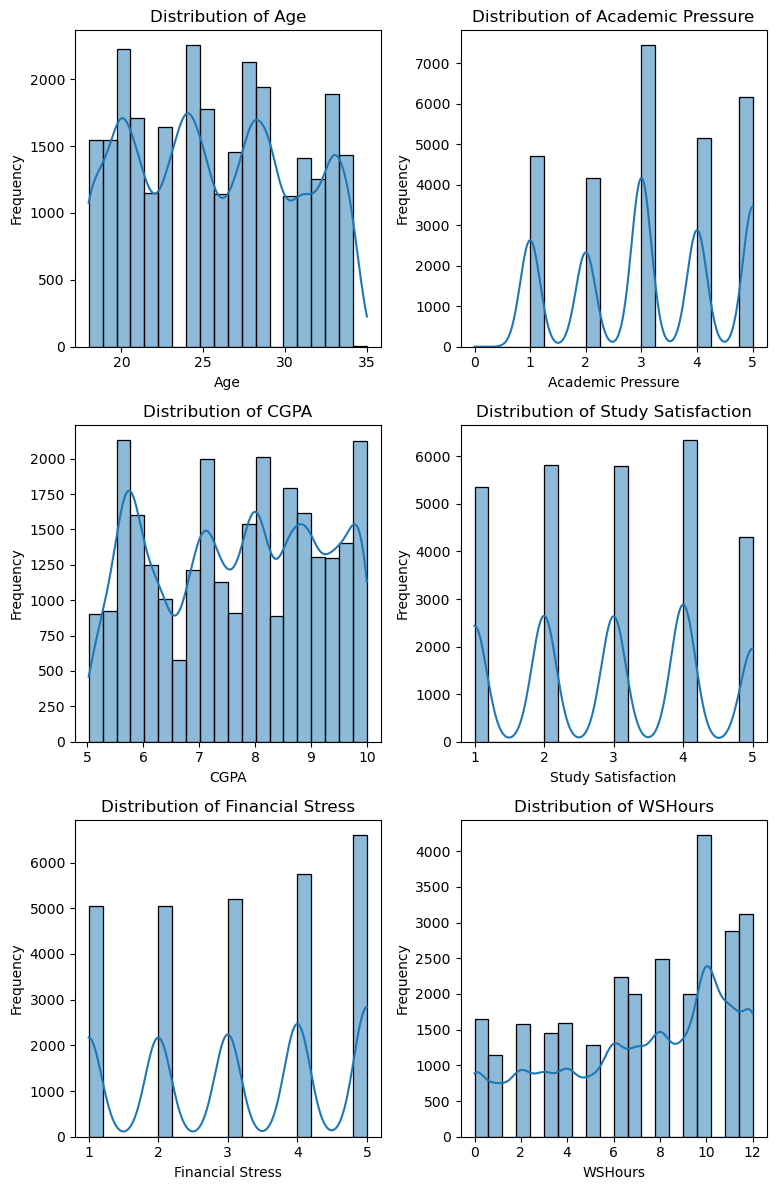

In [27]:
n=len(num_cols)
cols=2
rows=math.ceil(n/cols)
fig,axes=plt.subplots(rows,cols,figsize=(cols*4,rows*4))
axes=axes.flatten()

for i , col in enumerate(num_cols):
    sns.histplot(data[col],kde=True,ax=axes[i],bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()
    

### Data Transformation

**In this step, we reasonably simplify the data and convert the categorical data into numerical labels for later construction and training the model to use.**

First,we can see Sleep Duration and Dietary Habits include text (e.g., 5-6 hours') and the contain the element 'other' that is not easy to be classified.We’ll extract numeric values from it.

In [28]:
sleep_mapping = {'Less than 5 hours': 5,'5-6 hours': 5.5,'7-8 hours': 7.5, 'More than 8 hours': 9,
    'Others': np.nan 
}

data['Sleep Duration'] = data['Sleep Duration'].map(sleep_mapping)
# Drop rows with missing 'Sleep Duration' 
data = data.dropna(subset=['Sleep Duration'])

In [29]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [30]:
diet_mapping = {'Unhealthy': 0,'Moderate': 1,'Healthy': 2, 'Others': np.nan }

data['Dietary Habits'] = data['Dietary Habits'].map(diet_mapping)
# Drop rows with missing 'Dietary Habits'
data = data.dropna(subset=['Dietary Habits'])
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,WSHours,Financial Stress,FamilyHistory,Depression
0,Male,33.0,5.0,8.97,2.0,5.5,2.0,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5.5,1.0,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,5.0,2.0,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7.5,1.0,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5.5,1.0,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,5.5,0.0,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,5.0,2.0,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,5.5,0.0,MD,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,5.0,2.0,Class 12,Yes,10.0,5.0,No,1


We can see that the degree information is divided too meticulously and inconvenient to follow-up processing, so we can merge them according to the degree level.

In [31]:
data['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [32]:
degree_group = {
    'B.Pharm': 'Bachelor', 'BSc': 'Bachelor', 'BA': 'Bachelor', 'BCA': 'Bachelor', 'B.Ed': 'Bachelor',
    'BE': 'Bachelor', 'BHM': 'Bachelor', 'B.Com': 'Bachelor', 'B.Arch': 'Bachelor', 'B.Tech': 'Bachelor', 'BBA': 'Bachelor',

    'M.Tech': 'Master', 'M.Ed': 'Master', 'MSc': 'Master', 'M.Pharm': 'Master', 'MCA': 'Master',
    'MA': 'Master', 'MBA': 'Master', 'M.Com': 'Master', 'ME': 'Master', 'MHM': 'Master',

    'PhD': 'Doctorate', 'MD': 'Doctorate', 'MBBS': 'Doctorate',

    'LLB': 'Law', 'LLM': 'Law',

    'Class 12': 'High School',
    'Others': 'Other'
}

data['Degree'] = data['Degree'].map(degree_group)

In [33]:
degree_mapping = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4,
    'Law': 5,
    'Other': 6
}

data['Degree'] = data['Degree'].map(degree_mapping)

In [34]:
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,WSHours,Financial Stress,FamilyHistory,Depression
0,Male,33.0,5.0,8.97,2.0,5.5,2.0,2,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5.5,1.0,2,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,5.0,2.0,2,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7.5,1.0,2,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5.5,1.0,3,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,5.5,0.0,1,Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,5.0,2.0,3,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,5.5,0.0,4,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,5.0,2.0,1,Yes,10.0,5.0,No,1


The data of CGPA is too complicated and difficult to analyze. The essence of CGPA is to judge the level of scores based on scores. So we can choose the appropriate criteria to divide this feature into three levels.

In [35]:
# Categorize CGPA into three groups
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']
data['Grade level'] = pd.cut(data['CGPA'], bins=bins, labels=labels, right=False)
data = data.drop(columns=['CGPA'])

In [36]:
data

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,WSHours,Financial Stress,FamilyHistory,Depression,Grade level
0,Male,33.0,5.0,2.0,5.5,2.0,2,Yes,3.0,1.0,No,1,High
1,Female,24.0,2.0,5.0,5.5,1.0,2,No,3.0,2.0,Yes,0,Medium
2,Male,31.0,3.0,5.0,5.0,2.0,2,No,9.0,1.0,Yes,0,High
3,Female,28.0,3.0,2.0,7.5,1.0,2,Yes,4.0,5.0,Yes,1,Medium
4,Female,25.0,4.0,3.0,5.5,1.0,3,Yes,1.0,1.0,No,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.0,5.5,0.0,1,Yes,7.0,1.0,Yes,0,Medium
27897,Male,27.0,2.0,3.0,5.0,2.0,3,No,0.0,3.0,Yes,0,High
27898,Male,31.0,3.0,4.0,5.5,0.0,4,No,12.0,2.0,No,0,Medium
27899,Female,18.0,5.0,2.0,5.0,2.0,1,Yes,10.0,5.0,No,1,Medium


#### **Encoding categorical variables**

 'Age','Academic Pressure', 'Study Satisfaction', 'Financial Stress', 'WSHours'  are originally numerical features,and 'Study Satisfaction', 'Sleep Duration','Dietary Habits','Degree'  have been transformed into numerical features in the above operations.So next we need to convert the remaining features.

We transform the categorical data into numerical labels using LabelEncoder.

In [37]:
cat_cols = ['Gender', 'SuicidalThoughts', 'FamilyHistory', 'Grade level']

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders for later use
data

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,WSHours,Financial Stress,FamilyHistory,Depression,Grade level
0,1,33.0,5.0,2.0,5.5,2.0,2,1,3.0,1.0,0,1,0
1,0,24.0,2.0,5.0,5.5,1.0,2,0,3.0,2.0,1,0,1
2,1,31.0,3.0,5.0,5.0,2.0,2,0,9.0,1.0,1,0,0
3,0,28.0,3.0,2.0,7.5,1.0,2,1,4.0,5.0,1,1,1
4,0,25.0,4.0,3.0,5.5,1.0,3,1,1.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,5.0,5.5,0.0,1,1,7.0,1.0,1,0,1
27897,1,27.0,2.0,3.0,5.0,2.0,3,0,0.0,3.0,1,0,0
27898,1,31.0,3.0,4.0,5.5,0.0,4,0,12.0,2.0,0,0,1
27899,0,18.0,5.0,2.0,5.0,2.0,1,1,10.0,5.0,0,1,1


After the above process, all features of our dataset are converted into numeric types.

### Feature Engineering

In the previous processing process, we have performed many operations on features, including simplifying the feature name and dropping the irrelevant columns, etc.Next,we will creat a new feature 'Relative tress'. It is calculated by dividing Academic Pressure by the sum of Study Satisfaction and 1.This
feature  can better implement model.Creating meaningful features through calculating ratios can capture hidden patterns.

In [39]:
data['Relative stress'] = data['Academic Pressure'] / (data['Study Satisfaction'] + 1)

Then let's see the dataset after data processing.

In [40]:
data

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,WSHours,Financial Stress,FamilyHistory,Depression,Grade level,Relative stress
0,1,33.0,5.0,2.0,5.5,2.0,2,1,3.0,1.0,0,1,0,1.666667
1,0,24.0,2.0,5.0,5.5,1.0,2,0,3.0,2.0,1,0,1,0.333333
2,1,31.0,3.0,5.0,5.0,2.0,2,0,9.0,1.0,1,0,0,0.500000
3,0,28.0,3.0,2.0,7.5,1.0,2,1,4.0,5.0,1,1,1,1.000000
4,0,25.0,4.0,3.0,5.5,1.0,3,1,1.0,1.0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,5.0,5.5,0.0,1,1,7.0,1.0,1,0,1,0.833333
27897,1,27.0,2.0,3.0,5.0,2.0,3,0,0.0,3.0,1,0,0,0.500000
27898,1,31.0,3.0,4.0,5.5,0.0,4,0,12.0,2.0,0,0,1,0.600000
27899,0,18.0,5.0,2.0,5.0,2.0,1,1,10.0,5.0,0,1,1,1.666667


#### **Scaling the data**

Using the StandardScaler applied Standard Scaling to the numerical features in the dataset ensures all of the numerical columns can be scaled to have a mean of 0 and a standard deviation of 1.

In [41]:
X = data.drop('Depression', axis=1)  
y = data['Depression']

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### **Balancing the data**
We use the SMOTE (Synthetic Minority Over-sampling Technique) to address the class imbalance in the Depression variable.

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
y.value_counts()

Depression
1    16171
0    16171
Name: count, dtype: int64

### Model Implementation

Our dataset have target variable which is binary and our goal is to predict depression and classify each student,so we should choose the predictive model using **supervised learning techniques** on our dataset.Then we consider the following models.  
**Logistic Regression model** is simple and interpretable ,and it works well for binary classification.Our target variable is binary,so this model is suitable for our dataset.  Logistic Regression model should assume linear relationship between features and log-odds.   
**Random forest model** is the ensemble method that builds multiple decision trees,it performs effectively even with many features (though feature selection can still help).It provide intrinsic estimates of feature relevance, aiding interpretation.Our dataset has various features and our goal is to identify the factors that have the greatest impact on depression,so this model is also suitable for our dataset.  
**Gradient Boosting** is very powerful in dealing with numerical features, class features , and their combination.It works well for classification, so this model is suitable for our goals.  
Then we begin to train and evaluate these models using appropriate performance metrics.

**Train and Test Split**

First we should Split the data into training and testing sets using the train_test_split.

In [44]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Import necessary libraries to implement and evaluate the models.*

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.model_selection import  StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### **Logistic Regression**

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_absolute_error, mean_squared_error, confusion_matrix
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]
accuracy_score(y_test,y_pred_lr)
print(" Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
accuracy_score(y_test,y_pred_lr)


 Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3213
           1       0.84      0.85      0.85      3256

    accuracy                           0.84      6469
   macro avg       0.84      0.84      0.84      6469
weighted avg       0.84      0.84      0.84      6469

ROC AUC: 0.9223394517512163


0.8427886844952852

### **Random Forest**

In [47]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
#Accuracy
accuracy_score(y_test,y_pred_rf)
#Classification Report
print(classification_report(y_test,y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
accuracy_score(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3213
           1       0.86      0.87      0.86      3256

    accuracy                           0.86      6469
   macro avg       0.86      0.86      0.86      6469
weighted avg       0.86      0.86      0.86      6469

ROC AUC: 0.9349731224731226


0.8599474416447673

### **Gradient Boosting**

In [48]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

print(" Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_gb))

 Gradient Boosting
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3213
           1       0.87      0.87      0.87      3256

    accuracy                           0.87      6469
   macro avg       0.87      0.87      0.87      6469
weighted avg       0.87      0.87      0.87      6469

ROC AUC: 0.9403974256915434


**Compare the models**

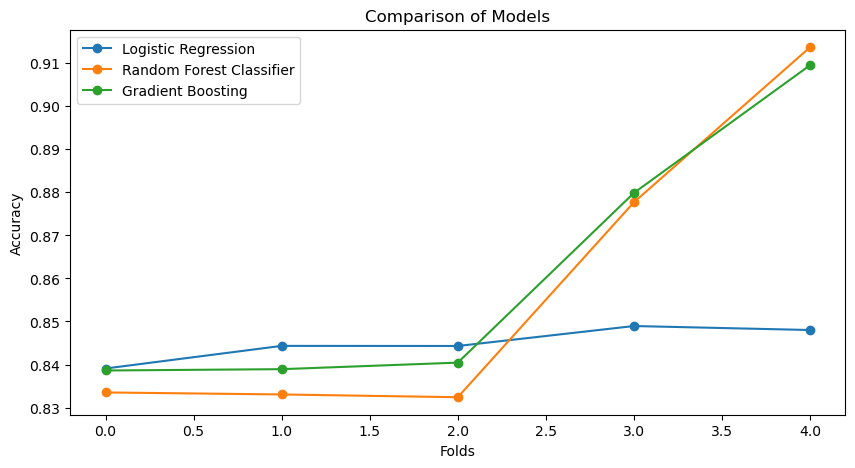

In [49]:
#Show Logistic Regression
from sklearn.model_selection import cross_val_score
lg_score=cross_val_score(lr,X,y,cv=5)
lg_score.mean()
#Random Forest Classifier
rf_score=cross_val_score(rf,X,y,cv=5)
rf_score.mean()
#Gradient Boosting
gb_score=cross_val_score(gb,X,y,cv=5)
gb_score.mean()
#ploting the comparison
plt.figure(figsize=(10,5))
plt.plot(lg_score, label='Logistic Regression', marker='o')
plt.plot(rf_score, label='Random Forest Classifier', marker='o')
plt.plot(gb_score, label='Gradient Boosting', marker='o')
plt.title('Comparison of Models')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

According to the analysis of the performance of the three models and the visualization of the models performance, the Random Forest Classifier and Gradient Boosting are obviously better.In the visual performance of the comparison of the two models, the two models performed similarly, but the accuracy and the AUC value of Gradient Boosting is higher than that of Random Forest Classifier, so we chose Gradient Boosting as the classification model to predict depression on the student dataset.

## **Hyperparameter Tuning for Gradient Boosting**

We use the Sequential Grid Search method for parameter optimization.The Core strategy is that we tune one hyperparameter at a time while keeping others fixed.

In [51]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb,
    cv=5,
    scoring='f1'
)
grid_gb.fit(X_train, y_train)

print("Best Params for Gradient Boosting:", grid_gb.best_params_)
print("Best F1-score:", grid_gb.best_score_)

Best Params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best F1-score: 0.869642762582947


After the above hyperparameter tuning step,we know best params for Gradient Boosting is include 'learning_rate'=0.1, 'max_depth'= 3,and 'n_estimators' is  200.Then let's implement the best model to achieve our goals.

### **Implement the Best Model**

In [53]:
gb_best = GradientBoostingClassifier(random_state=42,learning_rate=0.1, max_depth= 3,n_estimators=200)
gb_best.fit(X_train, y_train)
y_pred_best_gb =gb_best.predict(X_test)
y_proba_best_gb = gb_best.predict_proba(X_test)[:, 1]

print(" Gradient Boosting")
print(classification_report(y_test, y_pred_best_gb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best_gb))

 Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3213
           1       0.87      0.88      0.88      3256

    accuracy                           0.87      6469
   macro avg       0.87      0.87      0.87      6469
weighted avg       0.87      0.87      0.87      6469

ROC AUC: 0.9436149289090466


We can clearly see that the performance of the model has been improved.

### **Model Evaluation**

**Evaluation with appropriate metrics, visualizations and insights**

In [57]:
match_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best_gb
})
match_df['Match'] = match_df['Actual'] == match_df['Predicted']
match_df

,Actual,Predicted,Match
19009,0,0,True
1281,1,1,True
18195,0,0,True
17080,1,1,True
27888,0,0,True
...,...,...,...
1796,1,1,True
14301,1,1,True
27205,1,1,True
17295,0,0,True


In [58]:
report = classification_report(y_test, y_pred_best_gb, target_names=["Healthy", "Depression"])
print(report)

              precision    recall  f1-score   support

     Healthy       0.88      0.87      0.87      3213
  Depression       0.87      0.88      0.88      3256

    accuracy                           0.87      6469
   macro avg       0.87      0.87      0.87      6469
weighted avg       0.87      0.87      0.87      6469



**Analysis:** The hyperparameter tuned Gradient Boosting model achieves an accuracy of 87%, with strong recall of 88% for class depression.It indicates effective identification of depression cases.Therefore, this model has obvious significance for predicting students' depression.

**Draw Confusion Matrix**

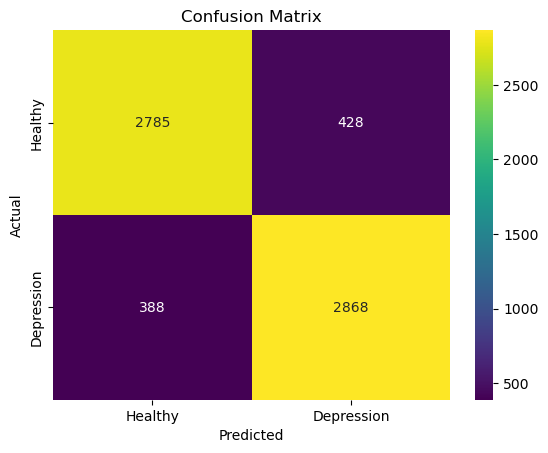

In [72]:
#draw Confusion Matrix
cof = confusion_matrix(y_test,y_pred_best_gb)
sns.heatmap(cof, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Healthy', 'Depression'], 
            yticklabels=['Healthy', 'Depression'])#set feather
plt.xlabel('Predicted')#set x
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

According to the above confusion matrix,most of the students with depression are correctly identified.So the model our created is effective.

**Draw ROC Curve and PR Curve**

The ROC curve is Receiver Operating Characteristic curve.It evaluates classifier performance using the Plotting True Positive Rate (TPR) and  False Positive Rate (FPR) across different probability thresholds.Among them,the False Positive Rate (FPR) is:$$FPR=\frac{FP}{FP+TN} $$ which measures proportion of actual negatives incorrectly classified as positive.
The true Positive Rate (TPR) is:$$TPR=\frac{TP}{TP+FN}  $$which measures proportion of actual positives correctly identified.
Using the diagonal line (AUC=0.5) as the random guessing baseline. **The closer the curve is to the upper left corner,the better the model performance.** 

The PR curve which is also Precision-Recall curve is a graphical tool can be used to evaluate the performance of binary classification models.It plots the relationship between Precision and Recall at varying classification thresholds. Recall is :$$Recall=\frac {TP}{TP+FN}$$ It is the radio of samples that are truly classified as positive and predicted as positive by the classifier.High Recall should have low false negative rate.Precision is :$$Precision=\frac {TP}{TP+FP}$$ It is the ratio of samples predicted as positive by the classifier that are True positive.**The closer the curve is to the upper right corner,the better the model performance.**

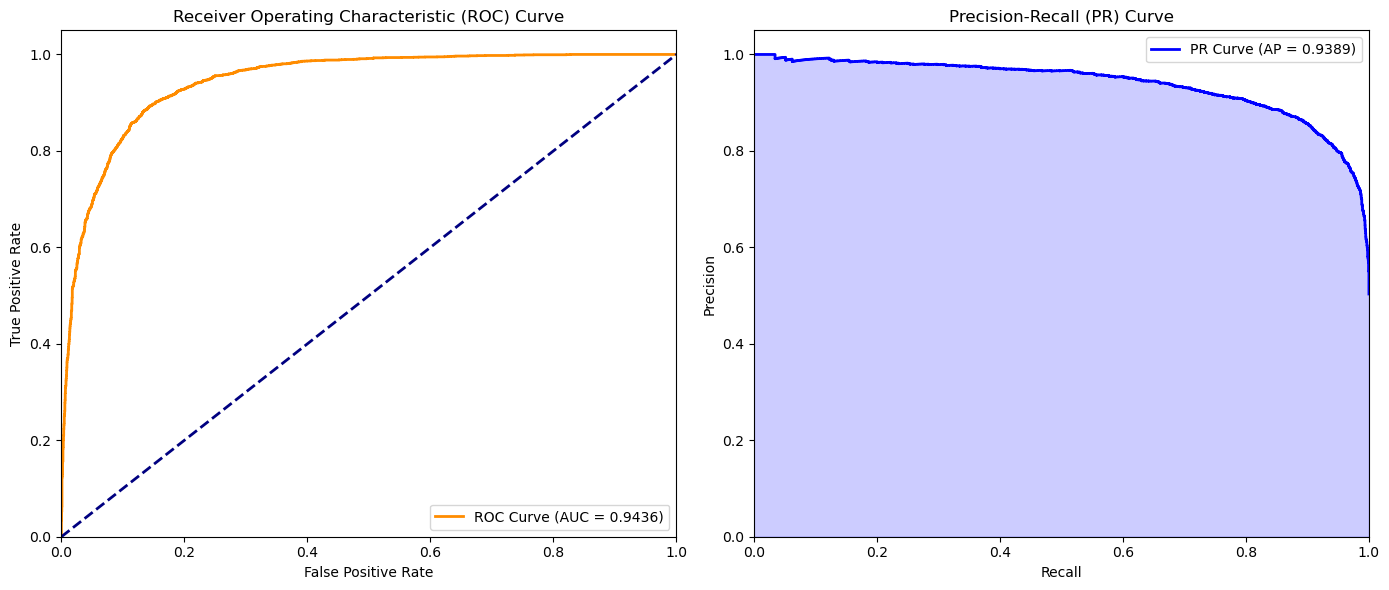

In [75]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# compute TPR and FPR
fpr, tpr, _ = roc_curve(y_test, y_proba_best_gb)
roc_auc = auc(fpr, tpr)

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_best_gb)
avg_precision = average_precision_score(y_test, y_proba_best_gb)

# Create the canvas
plt.figure(figsize=(14, 6))

# ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')#set 0.5 threshold
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# PR curve
plt.subplot(1, 2, 2)
plt.step(recall, precision, where='post', color='blue', lw=2, 
         label=f'PR Curve (AP = {avg_precision:.4f})')#set lines
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

By observing the visualization of the results,the ROC curve starts at the bottom-left (0,0), rapidly ascends to the top-left (0,1), and then extends horizontally to the top-right (1,1).So we can know the model achieves a high True Positive Rate (TPR) at a low False Positive Rate (FPR). Specifically, and the model can accurately identify samples of the target class with minimal misclassification of other classes as the target class.Overall,the model efficiently and accurately classifies the class of 'No Depression' and 'Depression'.The PR curve shows that the model performs well in both focusing on prediction accuracy and comprehensively finding positive samples in various weather recognition tasks.In conclusion,the model we created has excellent performance and can provide effective help in predicting students' depression.

### **Important features that cause depression**

Finally, we use the machine learning model that we construct to study the factors that cause students’ depression and the important features related to students’ depression.

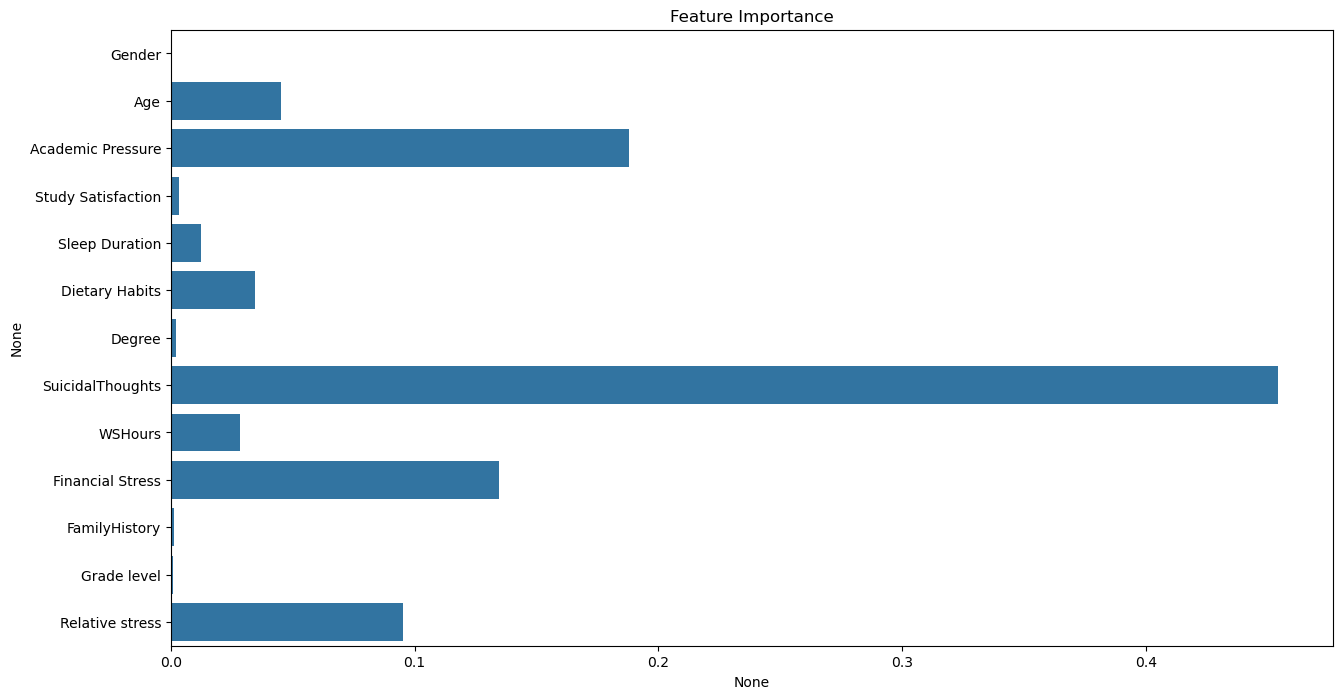

In [76]:
# Plot feature importances
feat_importances = pd.Series(gb_best.feature_importances_, index=data.drop('Depression', axis=1).columns)
plt.figure(figsize=(15,8))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importance')
plt.show()

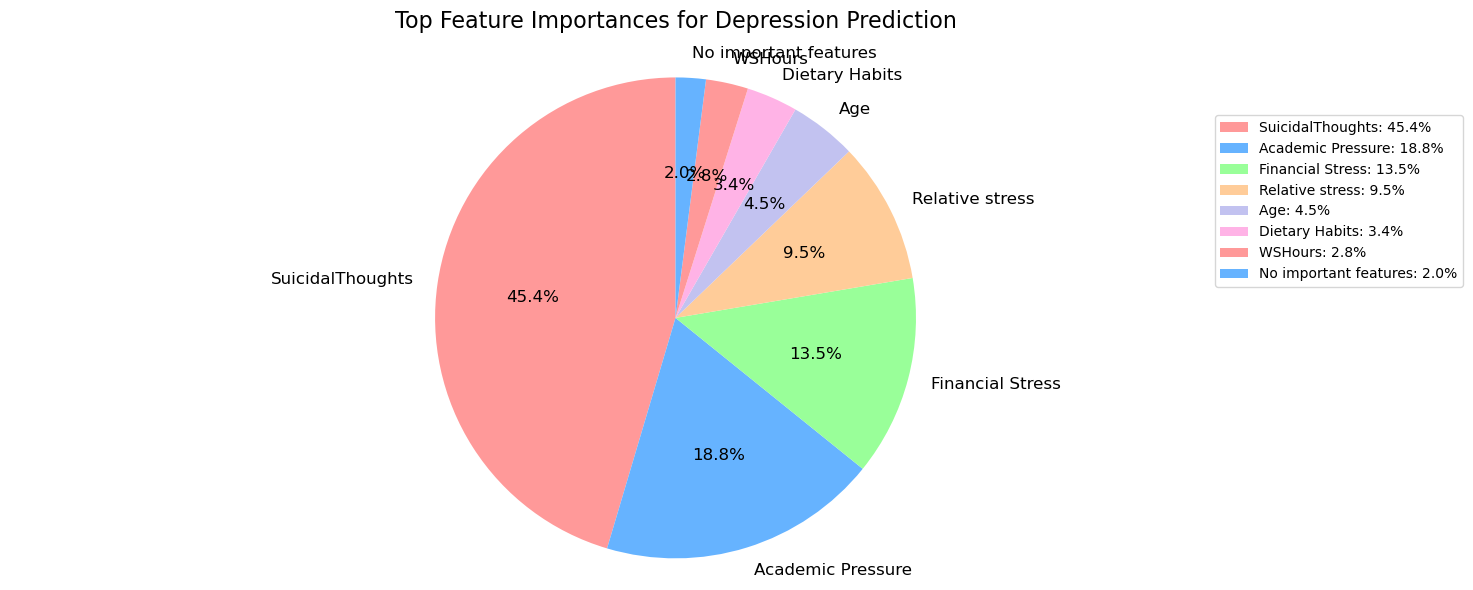

In [77]:
#Select 7 obvious features and display the rest features together
top_features = feat_importances.sort_values(ascending=False).head(7)
other_importance = feat_importances.sort_values(ascending=False)[7:].sum()

# Merge data
pie_data = pd.concat([top_features, pd.Series(other_importance, index=['No important features'])])

# Set pie chart style
plt.figure(figsize=(15, 6))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'],
    textprops={'fontsize': 12}
)
# Add legend
plt.legend(
    loc='upper left',
    bbox_to_anchor=(0.9, 0.9),
    labels=[f"{label}: {pct:.1f}%" for label, pct in zip(pie_data.index, pie_data/pie_data.sum()*100)]
)

# Add title and formatting
plt.title('Top Feature Importances for Depression Prediction', fontsize=16, pad=20)
plt.axis('equal')  

plt.tight_layout()
plt.show()

From the visualization of the results,we can see the feature of SuicidalThoughts is closely related to target variable depression.Financial Stress can also be considered as a main feature.Secondary features include Relative stress.Features beyond the 7 features that we show have negligible influence.

**Conclusions:**

This model first determines the Suicidal Thoughts features when predicting student depression.Then will consider Financial Stress and Sress next.The model will not very dependent on a range of featurers such as degree.

## **Summary**

This project we built the **Gradient Boosting** model that can effectively predict students' depression through a series of operations.We also evaluated the model's performance and showed that our model's performance was good, which proved the success of this project.At the same time, this model was used to analyze the features that affect students' depression, and gave guiding suggestions on the early detection of students' depression.I think in the future, machine learning models can be used to analyze and improve the overall student depression trends in society.